<img src="Fantasy-Football-App-LOGO.png">
<h1><center>ESPN QB Fantasy Football Projections vs. Actual Results Analysis</center></h1>
<br></br>
<h2><center>By: Ry Arnold</center></h2>



<h3><center>Introduction</center></h3>
<br></br>
Fantasy football is a very popular game that many avid sports fans play every NFL season. It is estimated that almost 60 million people are playing fantasy football this year, according to the Washington Post. Many people use popular platforms like ESPN and NFL.com to host their fantasy leagues. Each of these sites have tons of fantasy analysts who put out videos every week on what players to play, what players are injured, how matchups effect players, etc. These sites also put out projections each week to determine how they believe the player will preform. Many people use these projections to decide their lineups every week, while others choose to never believe the directions. Often times these projections are very far off from what the player actually scores as they are just projections of course. 

Many fantasy leagues have rules that allow you to only play one quarterback (QB) per week. Some allow for two. This position is often the most crucial position in fantasy as the QB is involved in every offensive snap. This means that any time the team is on offense the QB has a chance to gain points.

The way the QB scoring works can be seen below for a standard points per reception league.

+1 point per 25 pass yards
+4 points per touchdown (TD) pass thrown
+2 points per two point conversion thrown
-2 points per interception thrown
-2 points per fumble
+1 point per 10 rush yards
+6 points per TD run
+2 points per two point reception caught
+1 point per reception
+1 point per 10 receiving yards
+6 points per TD catch
+2 points per two point conversion reception

I included above both reception scoring and rushing scoring because the QB position over the years has greatly transitioned from just a pocket-passer type to a more dynamic running style. This means that QBs tend to run the ball more and on some trick plays catch the ball. Also the way scoring works is it includes decimal places. This means if a QB rushes for 5 yards only he will receive 0.5 points.

This tutorial will go over QB fantasy scores analysis for the 2018 NFL Season up to Week 14. I will look into first how accurate the projections are inorder to clear up the debate many people have in whether to trust the projections or their gut. I will also look into analysis on some of the projections for the top QBs this season in passing and the top QBs in rushing to decide whether it is better to start a QB that rushes the ball often vs. a more tradiational pocket passer. I will be using ESPN's data for fantasy football QB <a href="http://games.espn.com/ffl/leaders?&slotCategoryId=0&sortMap=AAAAARgAAAAHAQALc3RhdFF1ZXJ5SWQDAAAAAAEAEHN0YXRTb3VyY2VUeXBlSWQDAAAAAAEAD3Njb3JpbmdQZXJpb2RJZAMAAAANAQAGY29sdW1uA%2F%2F%2F%2F%2F0BAAxzdGF0U2Vhc29uSWQDAAAH4gEACGNhdGVnb3J5AwAAAAQBAAlkaXJlY3Rpb24D%2F%2F%2F%2F%2Fw%3D%3D&scoringPeriodId=1&seasonId=2018">projections</a> and <a href="http://games.espn.com/ffl/tools/projections?&slotCategoryId=0&scoringPeriodId=1&seasonId=2018&sortMap=AAAAARgAAAAHAQALc3RhdFF1ZXJ5SWQDAAAAAAEAEHN0YXRTb3VyY2VUeXBlSWQDAAAAAQEAD3Njb3JpbmdQZXJpb2RJZAMAAAABAQAGY29sdW1uA%2F%2F%2F%2F%2F0BAAxzdGF0U2Vhc29uSWQDAAAH4gEACGNhdGVnb3J5AwAAAAQBAAlkaXJlY3Rpb24D%2F%2F%2F%2F%2Fw%3D%3D">scores</a>.

<h3><center>Obtaining the Data</center></h3>
<br></br>
I will be using these libraries from Python 3 to aid in my tutorial: <a href="https://pandas.pydata.org/">pandas</a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html">Scipy T-Test</a>, 
<a href="http://www.numpy.org/">numpy</a>, <a href="http://www.numpy.org/">matplotlib</a>, <a href= "https://scikit-learn.org/stable/">scikit-learn</a>, <a href="https://seaborn.pydata.org/">seaborn</a>, and <a href="https://docs.python.org/3/library/re.html">regex.</a>

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import re

<p>
Fantasy football is a week-to-week game. I will be storing all my data in a list of dataframes. I chose to do this so because of how much each week changes the data. Some players go on bye one week or are injured. A bye week is when the players team does not play one week. It also makes accessing each weeks data extremely easy and efficient. It allows me to process all the data in one loop as opposed to going through each week individually.</p>

In [397]:
fantasyScoresByWeek = []
fantasyProjectionsByWeek = []
for week in range(1,15):
    fantasyScoresByWeek.append(pd.read_excel("FantasyScoresByWeek.xlsx", "Week"+str(week), 2))
    fantasyProjectionsByWeek.append(pd.read_excel("FantasyProjectionsByWeek.xlsx", "Week"+str(week), 1))
    
fantasyScoresByWeek[0].head()

,"PLAYER, TEAM POS",Unnamed: 1,OPP,STATUS ET,Unnamed: 4,C/A,Pass YDS,Pass TD,INT,Unnamed: 9,...,REC,Rec YDS,Rec TD,TAR,Unnamed: 18,2PC,FUML,TD,Unnamed: 22,PTS
0,"Ryan Fitzpatrick, TB QB",NaN,@NO,W 48-40,NaN,21/28,417,4,0,NaN,...,0,0,0,0,NaN,0,0,0,NaN,42.3
1,"Drew Brees, NO QB",NaN,TB,L 40-48,NaN,37/45,439,3,0,NaN,...,0,0,0,0,NaN,1,0,0,NaN,31.6
2,"Philip Rivers, LAC QB",NaN,KC,L 28-38,NaN,34/51,424,3,1,NaN,...,0,0,0,0,NaN,1,0,0,NaN,29.0
3,"Patrick Mahomes, KC QB",NaN,@LAC,W 38-28,NaN,15/27,256,4,0,NaN,...,0,0,0,0,NaN,0,0,0,NaN,28.3
4,"Aaron Rodgers, GB QB",NaN,Chi,W 24-23,NaN,20/30,286,3,0,NaN,...,0,0,0,0,NaN,0,0,0,NaN,24.9


<p>
Shown above is the top 5 QB performances from week 1 of the 2018 NFL Season. Below is a list of what each column means:
<ul>
<li>PLAYER, TEAM POS: Player, Team Pos- This column states the player's name, the team they play for, their position. In some cases it also displays their injury status if they are injured. The injury status is based on week 14 only. Therefore if a player is listed as 'IR' that means they had gotten hurt at some point in the season. 'IR' means injury reserves, 'Q' means questionable, and 'D' means doubtful.</li>

<li>All the unnamed columns are spacer columns that came with ESPN's data</li>

<li>OPP: The opponent the player's team is playing. '@' represents the game is away.</li>

<li>STATUS ET: This represents the result of the game</li>

<li>C/A: This is a ratio of completed passes to attempted passes</li>

<li>Pass YDS: How many passing yards the player had</li>

<li>Pass TDs: How many passing touchdowns the player had</li>

<li>INT: How many interceptions the player threw</li>

<li>RUSH: How many rush attempts the player had</li>

<li>Rush YDS: How many rush yards the player had</li>

<li>Rush TDs: How many rush touchdowns the player had</li>

<li>REC: How many receptions/catches the player had</li>

<li>Rec YDS: How many receiving yards the player had</li>

<li>Rec TDs: How many receiving touchdowns the player had</li>

<li>TAR: How many times the player was thrown to</li>

<li>2PC: How many two point conversions the player had</li>

<li>FUML: How many fumbles the player had</li>

<li>TD: How many miscellaneous touchdowns the player had. For example recovering a fumble in the endzone would be a miscellaneous touchdown</li></ul></p>

In [398]:
fantasyProjectionsByWeek[0].head()

,"PLAYER, TEAM POS",OPP,STATUS ET,C/A,Pass YDS,Pass TD,INT,RUSH,Rush YDS,Rush TD,REC,Rec YDS,Rec TD,PTS
0,"Tom Brady, NE QB",Hou,W 27-20,24/37.4,284.3,2.1,0.4,1.8,1.6,0.1,0,0,0,19.4
1,"Aaron Rodgers, GB QB",Chi,W 24-23,21.5/33.9,236.7,2.0,0.4,3.6,19.5,0.1,0,0,0,19.0
2,"Cam Newton, Car QB",Dal,W 16-8,18.8/32,228.7,1.4,0.8,7.6,36.9,0.4,0,0,0,18.7
3,"Andrew Luck, Ind QB",Cin,L 23-34,23.3/37.2,269.2,1.9,1.0,3.8,18.8,0.1,0,0,0,18.4
4,"Tyrod Taylor, Cle QB",Pit,T 21-21,19.3/30.9,219.2,1.5,0.4,5.3,30.1,0.2,0,0,0,18.2


<p>
The above dataset is the first week projections for the 2018 NFL season. Each column has the same meaning as before. The projections do not account for two point conversions or fumbles.
</p>

<h3><center>Tidying the Data</center></h3>
<br></br>
<p>
I will be tidying the data to get rid of the unnamed columns and also get rid of any player who is projected 0 points or scored 0 points. At the end I show the final week 1 tidied data.</p>

In [399]:
for week in range(0,14):
    temp = fantasyScoresByWeek.pop(0).drop("Unnamed: 1", axis=1)
    temp = temp.drop("Unnamed: 4", axis=1)
    temp = temp.drop("Unnamed: 9", axis=1)
    temp = temp.drop("Unnamed: 13", axis=1)
    temp = temp.drop("Unnamed: 18", axis=1)
    temp = temp.drop("Unnamed: 22", axis=1)
    for index, row in temp.iterrows():
        #If they scored 0 remove from the dataframe
        if (float(row['PTS']) == 0):
            temp = temp.drop(index, axis=0)
    fantasyScoresByWeek.append(temp)
fantasyScoresByWeek[0].head()

,"PLAYER, TEAM POS",OPP,STATUS ET,C/A,Pass YDS,Pass TD,INT,RUSH,Rush YDS,Rush TD,REC,Rec YDS,Rec TD,TAR,2PC,FUML,TD,PTS
0,"Ryan Fitzpatrick, TB QB",@NO,W 48-40,21/28,417,4,0,12,36,1,0,0,0,0,0,0,0,42.3
1,"Drew Brees, NO QB",TB,L 40-48,37/45,439,3,0,0,0,0,0,0,0,0,1,0,0,31.6
2,"Philip Rivers, LAC QB",KC,L 28-38,34/51,424,3,1,0,0,0,0,0,0,0,1,0,0,29.0
3,"Patrick Mahomes, KC QB",@LAC,W 38-28,15/27,256,4,0,5,21,0,0,0,0,0,0,0,0,28.3
4,"Aaron Rodgers, GB QB",Chi,W 24-23,20/30,286,3,0,1,15,0,0,0,0,0,0,0,0,24.9


<h3><center>Creating a New Dataframe List of Differences</center></h3>
<p>
Next I will create a dataframe of differences between projections and actual scores. A negative value means it was an underestimate by ESPN and a positive value means it is an overestimate by ESPN. I will be doing differences in every category. I will also reorder the projections dataframe to match what the actual scores data frame looks like in the following cell</p>

In [400]:
differences = []
for week in range(0,14):
    temp = pd.DataFrame(columns=['PLAYER, TEAM POS','OPP','STATUS ET','C/A','Pass YDS','Pass TD','INT','RUSH','Rush YDS','Rush TD','REC','Rec YDS','Rec TD','TAR','2PC','FUML','TD','PTS'])
    for index, row in fantasyScoresByWeek[week].iterrows():
        added = False
        for index_proj, row_proj in fantasyProjectionsByWeek[week].iterrows():
            if (row['PLAYER, TEAM POS'] == row_proj['PLAYER, TEAM POS']):
                c_a = re.split('/', row['C/A'])
                c_a_proj = re.split('/', row_proj['C/A'])
                comp_diff = float(c_a_proj[0]) - float(c_a[0])
                comp_diff = float("{0:.2f}".format(comp_diff))
                attempts_diff = float(c_a_proj[1]) - float(c_a[1])
                attempts_diff = float("{0:.2f}".format(attempts_diff))
                c_a_diff = str(comp_diff)+"/"+str(attempts_diff)
                pass_yds_diff = float(row_proj['Pass YDS'])-float(row['Pass YDS'])
                pass_tds_diff = float(row_proj['Pass TD'])-float(row['Pass TD'])
                int_diff = float(row_proj['INT'])-float(row['INT'])
                rush_diff = float(row_proj['RUSH'])-float(row['RUSH'])
                rush_yds_diff = float(row_proj['Rush YDS'])-float(row['Rush YDS'])
                rush_tds_diff = float(row_proj['Rush TD'])-float(row['Rush TD'])
                rec_diff = float(row_proj['REC'])-float(row['REC'])
                rec_yds_diff = float(row_proj['Rec YDS'])-float(row['Rec YDS'])
                rec_tds_diff = float(row_proj['Rec TD'])-float(row['Rec TD'])
                pts_diff = float(row_proj['PTS'])-float(row['PTS'])
                temp.loc[index] = [row['PLAYER, TEAM POS'], row['OPP'], row['STATUS ET'], c_a_diff, pass_yds_diff, pass_tds_diff, int_diff, rush_diff, rush_yds_diff, rush_tds_diff, rec_diff, rec_yds_diff, rec_tds_diff,row['TAR'], row['2PC'], row['FUML'],row['TD'], pts_diff]
                added = True
        if not added:
            c_a = re.split('/', row['C/A'])
            comp_diff = 0 - float(c_a[0])
            attempts_diff = 0 - float(c_a[1])
            c_a_diff = str(comp_diff)+"/"+str(attempts_diff)
            pass_yds_diff = 0-float(row['Pass YDS'])
            pass_tds_diff = 0-float(row['Pass TD'])
            int_diff = 0-float(row['INT'])
            rush_diff = 0-float(row['RUSH'])
            rush_yds_diff = 0-float(row['Rush YDS'])
            rush_tds_diff = 0-float(row['Rush TD'])
            rec_diff = 0-float(row['REC'])
            rec_yds_diff = 0-float(row['Rec YDS'])
            rec_tds_diff = 0-float(row['Rec TD'])
            pts_diff = 0-float(row['PTS'])
            temp.loc[index] = [row['PLAYER, TEAM POS'], row['OPP'], row['STATUS ET'], c_a_diff, pass_yds_diff, pass_tds_diff, int_diff, rush_diff, rush_yds_diff, rush_tds_diff, rec_diff, rec_yds_diff, rec_tds_diff,row['TAR'], row['2PC'], row['FUML'],row['TD'], pts_diff]
    differences.append(temp)
differences[0].head()

,"PLAYER, TEAM POS",OPP,STATUS ET,C/A,Pass YDS,Pass TD,INT,RUSH,Rush YDS,Rush TD,REC,Rec YDS,Rec TD,TAR,2PC,FUML,TD,PTS
0,"Ryan Fitzpatrick, TB QB",@NO,W 48-40,2.1/10.3,-142.5,-2.6,1.3,-8.8,-21.1,-0.9,0.0,0.0,0.0,0,0,0,0,-26.6
1,"Drew Brees, NO QB",TB,L 40-48,-13.8/-10.2,-158.5,-1.2,0.8,1.7,2.1,0.1,0.0,0.0,0.0,0,1,0,0,-14.1
2,"Philip Rivers, LAC QB",KC,L 28-38,-11.2/-14.7,-143.8,-1.0,-0.3,1.5,3.4,0.0,0.0,0.0,0.0,0,1,0,0,-11.1
3,"Patrick Mahomes, KC QB",@LAC,W 38-28,7.3/8.6,4.0,-2.7,0.9,-0.9,1.2,0.2,0.0,0.0,0.0,0,0,0,0,-11.6
4,"Aaron Rodgers, GB QB",Chi,W 24-23,1.5/3.9,-49.3,-1.0,0.4,2.6,4.5,0.1,0.0,0.0,0.0,0,0,0,0,-5.9


In [401]:
reorderedFantasyProjectionsByWeek = []
for week in range(0,14):
    temp1 = pd.DataFrame(columns=['PLAYER, TEAM POS','OPP','STATUS ET','C/A','Pass YDS','Pass TD','INT','RUSH','Rush YDS','Rush TD','REC','Rec YDS','Rec TD','TAR','2PC','FUML','TD','PTS'])
    for index, row in fantasyScoresByWeek[week].iterrows():
        added = False
        for index_proj, row_proj in fantasyProjectionsByWeek[week].iterrows():
            if (row['PLAYER, TEAM POS'] == row_proj['PLAYER, TEAM POS']):
                temp1.loc[index] = [row['PLAYER, TEAM POS'], row['OPP'], row['STATUS ET'], row_proj['C/A'], row_proj['Pass YDS'], row_proj['Pass TD'], row_proj['INT'], row_proj['RUSH'], row_proj['Rush YDS'], row_proj['Rush TD'], row_proj['REC'], row_proj['Rec YDS'], row_proj['Rec TD'],0, 0, 0,0, row_proj['PTS']]
                added = True
        if not added:
            temp1.loc[index] = [row['PLAYER, TEAM POS'], row['OPP'], row['STATUS ET'], "0/0", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    reorderedFantasyProjectionsByWeek.append(temp1)
reorderedFantasyProjectionsByWeek[0].head()

,"PLAYER, TEAM POS",OPP,STATUS ET,C/A,Pass YDS,Pass TD,INT,RUSH,Rush YDS,Rush TD,REC,Rec YDS,Rec TD,TAR,2PC,FUML,TD,PTS
0,"Ryan Fitzpatrick, TB QB",@NO,W 48-40,23.1/38.3,274.5,1.4,1.3,3.2,14.9,0.1,0,0,0,0,0,0,0,15.7
1,"Drew Brees, NO QB",TB,L 40-48,23.2/34.8,280.5,1.8,0.8,1.7,2.1,0.1,0,0,0,0,0,0,0,17.5
2,"Philip Rivers, LAC QB",KC,L 28-38,22.8/36.3,280.2,2.0,0.7,1.5,3.4,0.0,0,0,0,0,0,0,0,17.9
3,"Patrick Mahomes, KC QB",@LAC,W 38-28,22.3/35.6,260.0,1.3,0.9,4.1,22.2,0.2,0,0,0,0,0,0,0,16.7
4,"Aaron Rodgers, GB QB",Chi,W 24-23,21.5/33.9,236.7,2.0,0.4,3.6,19.5,0.1,0,0,0,0,0,0,0,19.0


Lastly, I will add a column to the data set to signify what week it is from. This will help in graphing the data by week.

In [402]:
for week in range(0,14):
    week_col = []
    for index, row in differences[week].iterrows():
        week_col.append(week+1)
    differences[week]['Week'] = week_col

differences[0].head()

,"PLAYER, TEAM POS",OPP,STATUS ET,C/A,Pass YDS,Pass TD,INT,RUSH,Rush YDS,Rush TD,REC,Rec YDS,Rec TD,TAR,2PC,FUML,TD,PTS,Week
0,"Ryan Fitzpatrick, TB QB",@NO,W 48-40,2.1/10.3,-142.5,-2.6,1.3,-8.8,-21.1,-0.9,0.0,0.0,0.0,0,0,0,0,-26.6,1
1,"Drew Brees, NO QB",TB,L 40-48,-13.8/-10.2,-158.5,-1.2,0.8,1.7,2.1,0.1,0.0,0.0,0.0,0,1,0,0,-14.1,1
2,"Philip Rivers, LAC QB",KC,L 28-38,-11.2/-14.7,-143.8,-1.0,-0.3,1.5,3.4,0.0,0.0,0.0,0.0,0,1,0,0,-11.1,1
3,"Patrick Mahomes, KC QB",@LAC,W 38-28,7.3/8.6,4.0,-2.7,0.9,-0.9,1.2,0.2,0.0,0.0,0.0,0,0,0,0,-11.6,1
4,"Aaron Rodgers, GB QB",Chi,W 24-23,1.5/3.9,-49.3,-1.0,0.4,2.6,4.5,0.1,0.0,0.0,0.0,0,0,0,0,-5.9,1


<h3><center>Analysis of Data</center></h3>
<br></br>
<p>
First I will plot the differences dataset to get a general idea of how accurate ESPN's projections are.

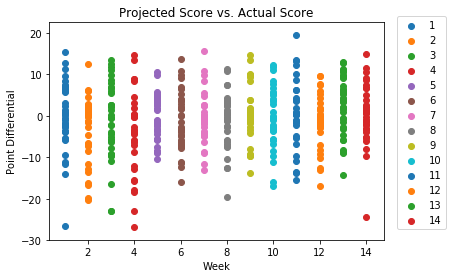

In [403]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for week in range(0,14):
    ax1.scatter(differences[week]['Week'], differences[week]['PTS'], label =str(week+1))
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.xlabel('Week')
plt.ylabel('Point Differential')
plt.title('Projected Score vs. Actual Score')
plt.show()
        

<p>From the bove graph it seems that at first glance ESPN is generally pretty close to the actual scores the player scores. This graph looks very similar to a violin plot. Let's see what that looks like. A violin plot plots a box and whisker plot mixed with the kernel density estimate. First I will need to combine all the datasets in differences into one dataframe.</p>

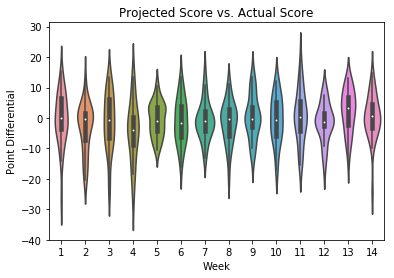

In [404]:
differences_combined = pd.concat(differences)

sns.violinplot(differences_combined['Week'], differences_combined['PTS'])
plt.xlabel('Week')
plt.ylabel('Point Differential')
plt.title('Projected Score vs. Actual Score')
plt.show()


<p>Looking at this graph it is very inconclusive whether or not ESPN is very accurate. This is because it seems that almost every week there are outliers that are far from the median values. The positive here is that the mean value seems to be right around 0 which means that on average the projections are relatively accurate.</p>

<h3><center>T-Test of Projected Scores vs. Actual Scores</center></h3>
<br></br>
<p>Here I will look into a week by week basis first to see if there is a correlation between projected score vs. actual score. After that I will do an overall t-test. My null hypothesis is that projected scores do accurately reflect actual scores.</p>

In [405]:
for week in range(0,14):
    print("Week: ", week+1)
    print(stats.ttest_ind(fantasyScoresByWeek[week]['PTS'],reorderedFantasyProjectionsByWeek[week]['PTS']))
    print()

Week:  1
Ttest_indResult(statistic=0.09062343645308973, pvalue=0.928066283513594)

Week:  2
Ttest_indResult(statistic=1.9077741209096672, pvalue=0.06090907264067884)

Week:  3
Ttest_indResult(statistic=0.6076912787393846, pvalue=0.5453587400851017)

Week:  4
Ttest_indResult(statistic=1.933052818730465, pvalue=0.057656329210020514)

Week:  5
Ttest_indResult(statistic=0.26944636307612446, pvalue=0.7884530407163997)

Week:  6
Ttest_indResult(statistic=0.5700383953739133, pvalue=0.5706473988888352)

Week:  7
Ttest_indResult(statistic=0.36145780890368556, pvalue=0.7189861354315936)

Week:  8
Ttest_indResult(statistic=0.7277194670967938, pvalue=0.4694393423582719)

Week:  9
Ttest_indResult(statistic=-0.19971671899905308, pvalue=0.8423774698925318)

Week:  10
Ttest_indResult(statistic=0.2338887265416268, pvalue=0.8158675778195854)

Week:  11
Ttest_indResult(statistic=-0.29121238044427117, pvalue=0.7719278087297675)

Week:  12
Ttest_indResult(statistic=0.7680134966377766, pvalue=0.445218381794

In [406]:
combined_projections = pd.concat(reorderedFantasyProjectionsByWeek)
combined_scores = pd.concat(fantasyScoresByWeek)

print("Combined Results:")
print(stats.ttest_ind(combined_scores['PTS'],combined_projections['PTS']))



Combined Results:
Ttest_indResult(statistic=1.498563928064977, pvalue=0.13432982840324195)


<p>In the above T-tests it seems that only for week 2 and week 4 we can reject the null hypothesis of equal averages for projected and actual scores. This means that they average out to the same value however for individual players we would have to look more into specific cases. Also the value for overall combined T-test scores p-value is very close to rejecting the null hypothesis that they are not equal averages.</p>

<h3><center>Looking at Specific Players</center></h3>
<br></br>
<p>In this section I will look into specific cases of QBs that have played every game for their team this season. The QBs I chose were Patrick Mahomes, Case Keenum, Tom Brady, Philip Rivers, Drew Brees, Eli Manning, and Derek Carr. These QBs have played every week this season except for their bye week. They are also relatively spread out on the overall rankings that way there is no bias from ESPN towards the top scorers.</p>

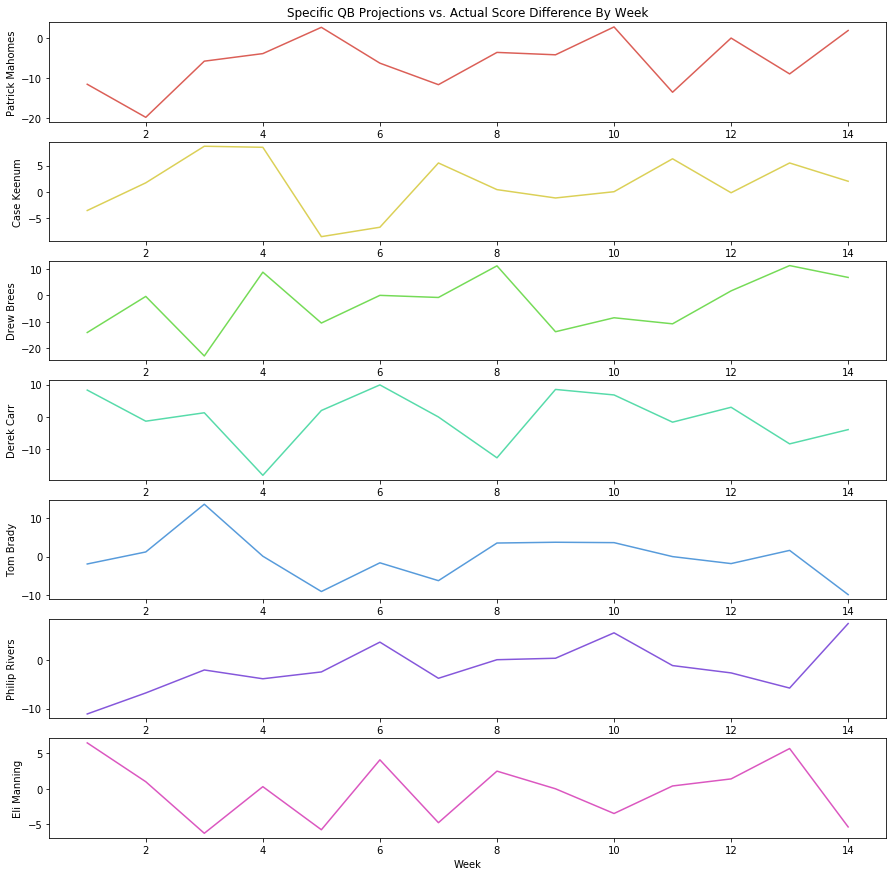

In [407]:
mahomes = [] #Bye Week 12
keenum = [] #Bye Week 10
brady = [] #Bye Week 11
rivers = [] #Bye Week 8
brees = [] #Bye Week 6
manning = [] #Bye Week 9
carr = [] #Bye Week 7

for week in range(0,14):
    if (week == 6):
        brees.append(0)
    elif (week == 7):
        carr.append(0)
    elif (week == 8):
        rivers.append(0)
    elif (week == 9):
        manning.append(0)
    elif (week == 10):
        keenum.append(0)
    elif (week == 11):
        brady.append(0)
    elif (week == 12):
        mahomes.append(0)
    for index, row in differences[week].iterrows():
        if (row['PLAYER, TEAM POS'] == "Drew Brees, NO QB"):
            brees.append(row['PTS'])
        elif (row['PLAYER, TEAM POS'] == "Derek Carr, Oak QB"):
            carr.append(row['PTS'])
        elif (row['PLAYER, TEAM POS'] == "Philip Rivers, LAC QB"):
            rivers.append(row['PTS'])
        elif (row['PLAYER, TEAM POS'] == "Eli Manning, NYG QB"):
            manning.append(row['PTS'])
        elif (row['PLAYER, TEAM POS'] == "Case Keenum, Den QB"):
            keenum.append(row['PTS'])
        elif (row['PLAYER, TEAM POS'] == "Tom Brady, NE QB"):
            brady.append(row['PTS'])
        elif (row['PLAYER, TEAM POS'] == "Patrick Mahomes, KC QB"):
            mahomes.append(row['PTS'])
#Get random colors paletter from seaborn   
colors = sns.color_palette("hls", 7)
plt.figure(num=1, figsize=(15,15)) 
plt.subplot(711)
plt.title('Specific QB Projections vs. Actual Score Difference By Week')
plt.plot(range(1,15), mahomes, label="Patrick Mahomes", color=colors[0])
plt.ylabel("Patrick Mahomes")
plt.subplot(712)
plt.plot(range(1,15), keenum, label="Case Keenum", color=colors[1])
plt.ylabel("Case Keenum")
plt.subplot(713)
plt.plot(range(1,15), brees, label="Drew Brees", color=colors[2])
plt.ylabel("Drew Brees")
plt.subplot(714)
plt.plot(range(1,15), carr, label="Derek Carr", color=colors[3])
plt.ylabel("Derek Carr")
plt.subplot(715)
plt.plot(range(1,15), brady, label="Tom Brady", color=colors[4])
plt.ylabel("Tom Brady")
plt.subplot(716)
plt.plot(range(1,15), rivers, label="Philip Rivers", color=colors[5])
plt.ylabel("Philip Rivers")
plt.subplot(717)
plt.plot(range(1,15), manning, label="Eli Manning", color=colors[6])
plt.ylabel("Eli Manning")
plt.xlabel("Week")

plt.show()

<p>The above plots show the differences in projections over time for certain QBs. For the majority of the graphs above bounce from over projections to under projections. However for Philip Rivers and Patrick Mahomes they seem to be constanly underestimated. Most of their differences in scoring are negative. This means again that the projections are underestimated.</p>

My next test will be to determine if the above graphs show an increase in accuracy over time. My hypothesis is that as time goes on the accuracy should increase. Therefore at later weeks in the season I expect the projections to flatten out to 0. To see if this is true I will look at linear regression lines for each of the graphs above. I will also fit a 2nd degree regression line to see the if they help in predicting whether or not ESPN is getting more accurate over time with their projections

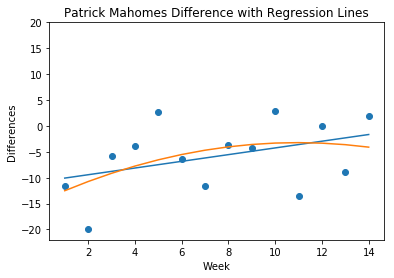

Standard Deviation: 6.484424037803265
Mean: -5.871428571428571


In [408]:
reg = LinearRegression()
X_mahomes = [[x] for x in range(1,15)]
y_mahomes = [[y] for y in mahomes]
mahomes_fit = reg.fit(X_mahomes, y_mahomes)
new_y = reg.predict(X_mahomes)
z = np.poly1d(np.polyfit(range(1,15),mahomes,2))
plt.subplot(111)
plt.scatter(X_mahomes, mahomes)
plt.plot(X_mahomes, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Patrick Mahomes Difference with Regression Lines")
plt.ylim((-22,20))
plt.show()
print("Standard Deviation:", np.std(mahomes))
print("Mean:",np.mean(mahomes))

<p>The above results show that over time the projections for Patrick Mahomes has trended toward a 0 difference between prediction and actual. The second degree of fit line also seems to bottom out as it closer to week 14 meaning ESPN is getting better at predicting Patrick Mahomes's fantasy points. Looking at Mahomes mean value and standard deviation, it seems that ESPN constantly underestimated his capabilities.</p>

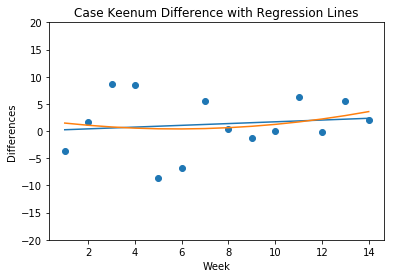

Standard Deviation: 5.11412609487542
Mean: 1.2999999999999996


In [409]:
reg = LinearRegression()
X = [[x] for x in range(1,15)]
y = [[y] for y in keenum]
keenum_fit = reg.fit(X, y)
new_y = reg.predict(X)
z = np.poly1d(np.polyfit(range(1,15),keenum,2))
plt.subplot(111)
plt.scatter(X, keenum)
plt.plot(X, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Case Keenum Difference with Regression Lines")
plt.ylim((-20,20))
plt.show()
print("Standard Deviation:", np.std(keenum))
print("Mean:",np.mean(keenum))

<p>Case Keenum's results are slightly different. His trendline increases away from 0 but only very slightly. This leads me to believe that he has been predicted pretty acurrately from the start of the season. The same can be seen with the 2nd degree regression line. After Looking at the mean and standard deviation and comparing them to other QBs it seems ESPN is pretty accurate at predicting Case Keenum's fantasy scores.</p>

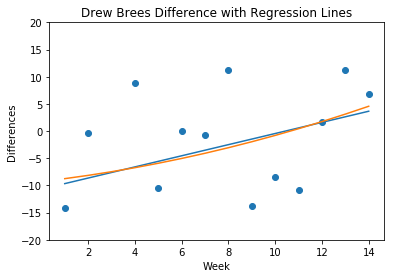

Standard Deviation: 10.251443402601152
Mean: -3.0071428571428576


In [410]:
reg = LinearRegression()
X = [[x] for x in range(1,15)]
y = [[y] for y in brees]
brees_fit = reg.fit(X, y)
new_y = reg.predict(X)
z = np.poly1d(np.polyfit(range(1,15),brees,2))
plt.subplot(111)
plt.scatter(X, brees)
plt.plot(X, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Drew Brees Difference with Regression Lines")
plt.ylim((-20,20))
plt.show()
print("Standard Deviation:", np.std(brees))
print("Mean:",np.mean(brees))

<p>For Drew Brees both the linear regression line and the 2nd degree line show a trend towards over estimating Drew Brees's fantasy scores. This leads me to believe that Brees started out being underestimated and having a great start to the season, but as the season has gone on his level of play has gone down leading to worse fantasy performances. Also looking at his standard deviation compared to others, ESPN's projections for Drew Brees's scores are all over the place. They have no idea what he will do every week.</p>

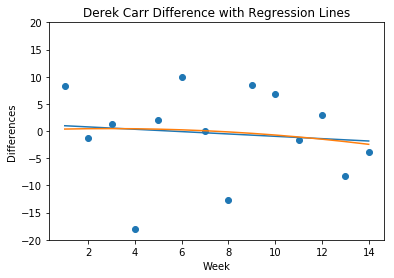

Standard Deviation: 7.877198429774435
Mean: -0.4214285714285716


In [411]:
reg = LinearRegression()
X = [[x] for x in range(1,15)]
y = [[y] for y in carr]
carr_fit = reg.fit(X, y)
new_y = reg.predict(X)
z = np.poly1d(np.polyfit(range(1,15),carr,2))
plt.subplot(111)
plt.scatter(X, carr)
plt.plot(X, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Derek Carr Difference with Regression Lines")
plt.ylim((-20,20))
plt.show()
print("Standard Deviation:", np.std(carr))
print("Mean:",np.mean(carr))

<p>Derek Carr looks very similar to Case Keenum's graph. Both trendlines show little variation in slope from 0 which at first looks like a good sign. Looking at his mean value it is very close to 0, but his standard deviation is larger than others. This leads me to believe that although his mean value is close to 0 his projections bounce from being overestimated to underestimated.</p>

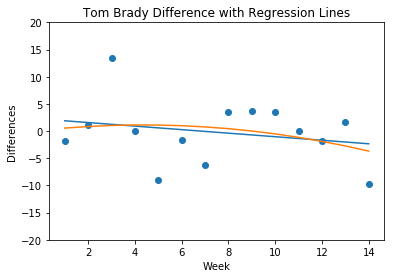

Standard Deviation: 5.665456553463602
Mean: -0.22142857142857153


In [412]:
reg = LinearRegression()
X = [[x] for x in range(1,15)]
y = [[y] for y in brady]
brady_fit = reg.fit(X, y)
new_y = reg.predict(X)
z = np.poly1d(np.polyfit(range(1,15),brady,2))
plt.subplot(111)
plt.scatter(X, brady)
plt.plot(X, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Tom Brady Difference with Regression Lines")
plt.ylim((-20,20))
plt.show()
print("Standard Deviation:", np.std(brady))
print("Mean:",np.mean(brady))

<p>Tom Brady's projection seem to be a lot more accurate then other QBs. They mostly stay in between a difference of 5. Also it seems that right from the beginning Tom Brady's projections by ESPN has been right on the money. This could be due to the fact that he is the oldest starting QB in the league and ESPN Analysts have seen him play for 19 seasons.</p>

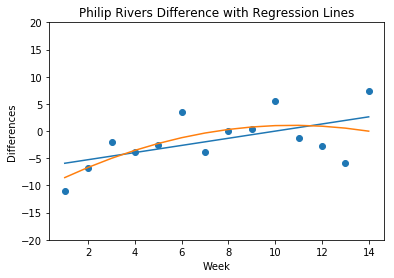

Standard Deviation: 4.721342121534026
Mean: -1.6500000000000006


In [413]:
reg = LinearRegression()
X = [[x] for x in range(1,15)]
y = [[y] for y in rivers]
rivers_fit = reg.fit(X, y)
new_y = reg.predict(X)
z = np.poly1d(np.polyfit(range(1,15),rivers,2))
plt.subplot(111)
plt.scatter(X, rivers)
plt.plot(X, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Philip Rivers Difference with Regression Lines")
plt.ylim((-20,20))
plt.show()
print("Standard Deviation:", np.std(rivers))
print("Mean:",np.mean(rivers))

<p>Philip Rivers started the season being constantly unestimated and seems to also be finishing the season underestimated as only the middle weeks of the season ESPN has been accurate with Philip Rivers Projections. The 2nd degree trendline starts to tail off at the beginning and the end of the season. His standard deviation is one of the lowest compared to other QBs, therefore ESPN is consistent in underestimating Philip Rivers.</p>

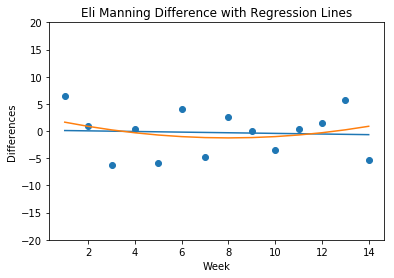

Standard Deviation: 4.1205371652992335
Mean: -0.2785714285714284


In [414]:
reg = LinearRegression()
X = [[x] for x in range(1,15)]
y = [[y] for y in manning]
manning_fit = reg.fit(X, y)
new_y = reg.predict(X)
z = np.poly1d(np.polyfit(range(1,15),manning,2))
plt.subplot(111)
plt.scatter(X, manning)
plt.plot(X, new_y)
plt.plot(X, z(X))
plt.xlabel("Week")
plt.ylabel("Differences")
plt.title("Eli Manning Difference with Regression Lines")
plt.ylim((-20,20))
plt.show()
print("Standard Deviation:", np.std(manning))
print("Mean:",np.mean(manning))

<p>ESPN seems to be very accurate with their predictions for Eli Manning. His mean difference in score is very close to 0 and his standard deviation is the lowest of all the QBs in this sample. His trendlines are both right around 0. </p>

<h3><center>Conclusion</center></h3>
<p>Through multiple experiments I came to the conclusion that ESPN's projections only sometimes provide accurate results compared to the actual scoring of the player. It seems that ESPN is good at predicting some players more than others. If you have one of these players on your team you can feel comfortable following the projections. If you have someone else you are running the risk of either a bad performance or a better performance. Some players are constantly underestimated, this means that you should always feel comfortable playing this person no matter what the projections say.</p>
    
<p>Fantasy football is a very popular game that many people gamble on. Any type of game that involves gambling always runs the risk of losing and gamblers know that. But gamblers also know that some risks are better than others. Using this tutorial I hope you now know how to better evaluate you fantasy lineup for the QB position every week.</p>